In [2]:
import numpy as np
from nltk.corpus import wordnet as wn
from tqdm import tqdm

In [3]:
import gensim, logging

In [4]:
ss_df_triple_list = []
for i in range(12):
    with open('wsd_result/ss_def_wsd_adapted_lesk_' + str(i+1) + '.txt', 'r') as fp:
        lines = fp.readlines()
        for j in range(0, len(lines), 3):
            if len(lines[j])>0:
                ss_df_triple_list.append((lines[j].replace('\n', ''), lines[j+2].replace('\n', '')))

In [5]:
len(ss_df_triple_list)

117659

In [6]:
ss_df_triple_list[0]

('able.a.01',
 "(  None  False  usually  Synset('normally.r.01')  False  followed  Synset('succeed.v.02')  False  by  None  False  `to  None  False  '  None  False  )  None  False  having  None  False  the  None  False  necessary  Synset('necessary.a.01')  False  means  Synset('mean.n.01')  False  or  None  False  skill  None  False  or  None  False  know-how  None  False  or  None  False  authority  Synset('authority.n.02')  False  to  None  False  do  None  False  something  None  False  ")

In [7]:
synset_list = list(wn.all_synsets())

In [8]:
# 'positive.a.01' in synset_list
# synset_list[0].name()
synset_name_list = []
for ss in synset_list:
    synset_name_list.append(ss.name())

In [9]:
len(synset_name_list)

117659

In [36]:
'positive.a.01' in synset_name_list

True

In [10]:
ss_df_ss_pair_list = []

for ss_df_triple in tqdm(ss_df_triple_list):
    curr_df_ss_list = ss_df_triple[1].split('  ')[:-1]
    curr_ss_df_ss_list = []
    p_flag = True
    for i in range(0, len(curr_df_ss_list), 3):
#         print(curr_df_ss_list[i])
        if curr_df_ss_list[i] == ')':
#             print(') detected flag back to be true')
            p_flag = True
            continue 
        if p_flag == True:
            if curr_df_ss_list[i] == '(':
#                 print('( detected flag to false')
                p_flag = False
                continue
            else:
                if curr_df_ss_list[i+1] != 'None':
                    curr_tmp_ss = curr_df_ss_list[i+1][8:-2]
                    if curr_df_ss_list[i+2] != 'True':
                        curr_ss_df_ss_list.append(curr_tmp_ss)
                    else:
                        if wn.synset(curr_tmp_ss).lemmas():
                            if wn.synset(curr_tmp_ss).lemmas()[0].antonyms():
                                curr_ss_df_ss_list.append(wn.synset(curr_tmp_ss).lemmas()[0].antonyms()[0].name())
                else:
                    continue
        else:
            continue
            
    ss_df_ss_pair_list.append((ss_df_triple[0], curr_ss_df_ss_list))

100%|██████████| 117659/117659 [00:01<00:00, 68025.42it/s]


In [11]:
ss_df_ss_pair_list[0]

('able.a.01', ['necessary.a.01', 'mean.n.01', 'authority.n.02'])

In [12]:
len(ss_df_ss_pair_list)

117659

In [9]:
tcnt = 0
for _tmp in ss_df_ss_pair_list:
    if len(_tmp[1]) == 0:
        tcnt +=1
#         print(_tmp)
print(tcnt)

577


#### : 577 synsets don't have any related ones. -> should be trimmed off for syn2vec input data

In [10]:
# trimmed_ss_df_ss_pair_list = []

# for _tmp in ss_df_ss_pair_list:
#     if len(_tmp[1]) != 0:
#         trimmed_ss_df_ss_pair_list.append(_tmp)

In [11]:
# len(trimmed_ss_df_ss_pair_list)

117082

In [14]:
# trimmed_ss_df_ss_pair_list[10]

('dissilient.s.01',
 ['explode.v.02',
  'receptive.a.02',
  'violence.n.01',
  'source.n.03',
  'vessel.n.03'])

In [13]:
import gensim, logging

In [14]:
model = gensim.models.Word2Vec(iter=15) 

In [15]:
sentences = []
for ss_pair in ss_df_ss_pair_list:
    if ss_pair[0] == 'positive.a.01':
        print('found')
    curr_sent = []
    curr_sent.append(ss_pair[0])
    curr_sent.extend(ss_pair[1])
    sentences.append(curr_sent)

found


In [16]:
len(sentences)

117659

In [17]:
sentences[0]

['able.a.01', 'necessary.a.01', 'mean.n.01', 'authority.n.02']

In [141]:
model = gensim.models.Word2Vec(sentences, size=10000, window=5, min_count=1, workers=8, sg=1)

2017-12-05 02:25:43,519 : INFO : collecting all words and their counts
2017-12-05 02:25:43,521 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-12-05 02:25:43,541 : INFO : PROGRESS: at sentence #10000, processed 43160 words, keeping 16997 word types
2017-12-05 02:25:43,563 : INFO : PROGRESS: at sentence #20000, processed 84660 words, keeping 29882 word types
2017-12-05 02:25:43,591 : INFO : PROGRESS: at sentence #30000, processed 141015 words, keeping 41567 word types
2017-12-05 02:25:43,625 : INFO : PROGRESS: at sentence #40000, processed 204390 words, keeping 52810 word types
2017-12-05 02:25:43,660 : INFO : PROGRESS: at sentence #50000, processed 268126 words, keeping 62059 word types
2017-12-05 02:25:43,693 : INFO : PROGRESS: at sentence #60000, processed 334554 words, keeping 70894 word types
2017-12-05 02:25:43,722 : INFO : PROGRESS: at sentence #70000, processed 400499 words, keeping 79803 word types
2017-12-05 02:25:43,754 : INFO : PROGRESS: at se

2017-12-05 02:29:48,109 : INFO : PROGRESS: at 33.03% examples, 5271 words/s, in_qsize 16, out_qsize 0
2017-12-05 02:29:49,740 : INFO : PROGRESS: at 33.67% examples, 5323 words/s, in_qsize 15, out_qsize 0
2017-12-05 02:29:51,587 : INFO : PROGRESS: at 33.87% examples, 5323 words/s, in_qsize 16, out_qsize 0
2017-12-05 02:29:53,698 : INFO : PROGRESS: at 34.53% examples, 5406 words/s, in_qsize 15, out_qsize 0
2017-12-05 02:29:57,095 : INFO : PROGRESS: at 34.92% examples, 5411 words/s, in_qsize 15, out_qsize 0
2017-12-05 02:29:58,627 : INFO : PROGRESS: at 35.31% examples, 5461 words/s, in_qsize 15, out_qsize 0
2017-12-05 02:30:00,073 : INFO : PROGRESS: at 35.55% examples, 5470 words/s, in_qsize 15, out_qsize 0
2017-12-05 02:30:01,736 : INFO : PROGRESS: at 36.26% examples, 5560 words/s, in_qsize 15, out_qsize 0
2017-12-05 02:30:05,138 : INFO : PROGRESS: at 36.81% examples, 5563 words/s, in_qsize 15, out_qsize 0
2017-12-05 02:30:06,318 : INFO : PROGRESS: at 37.45% examples, 5621 words/s, in_qs

2017-12-05 02:32:14,107 : INFO : PROGRESS: at 75.71% examples, 7285 words/s, in_qsize 15, out_qsize 0
2017-12-05 02:32:15,738 : INFO : PROGRESS: at 76.20% examples, 7307 words/s, in_qsize 16, out_qsize 0
2017-12-05 02:32:18,319 : INFO : PROGRESS: at 76.77% examples, 7310 words/s, in_qsize 15, out_qsize 0
2017-12-05 02:32:19,753 : INFO : PROGRESS: at 77.20% examples, 7335 words/s, in_qsize 16, out_qsize 0
2017-12-05 02:32:21,187 : INFO : PROGRESS: at 77.86% examples, 7361 words/s, in_qsize 15, out_qsize 0
2017-12-05 02:32:24,194 : INFO : PROGRESS: at 79.42% examples, 7409 words/s, in_qsize 16, out_qsize 0
2017-12-05 02:32:25,712 : INFO : PROGRESS: at 80.25% examples, 7432 words/s, in_qsize 16, out_qsize 0
2017-12-05 02:32:27,576 : INFO : PROGRESS: at 81.04% examples, 7448 words/s, in_qsize 15, out_qsize 0
2017-12-05 02:32:30,465 : INFO : PROGRESS: at 82.62% examples, 7497 words/s, in_qsize 16, out_qsize 0
2017-12-05 02:32:32,308 : INFO : PROGRESS: at 83.90% examples, 7539 words/s, in_qs

In [167]:
model_1000 = gensim.models.Word2Vec(sentences, size=1000, window=5, min_count=1, workers=8, sg=1)

2017-12-05 03:50:45,714 : INFO : collecting all words and their counts
2017-12-05 03:50:45,717 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2017-12-05 03:50:45,836 : INFO : PROGRESS: at sentence #10000, processed 43160 words, keeping 16997 word types
2017-12-05 03:50:45,878 : INFO : PROGRESS: at sentence #20000, processed 84660 words, keeping 29882 word types
2017-12-05 03:50:45,945 : INFO : PROGRESS: at sentence #30000, processed 141015 words, keeping 41567 word types
2017-12-05 03:50:46,011 : INFO : PROGRESS: at sentence #40000, processed 204390 words, keeping 52810 word types
2017-12-05 03:50:46,075 : INFO : PROGRESS: at sentence #50000, processed 268126 words, keeping 62059 word types
2017-12-05 03:50:46,190 : INFO : PROGRESS: at sentence #60000, processed 334554 words, keeping 70894 word types
2017-12-05 03:50:46,507 : INFO : PROGRESS: at sentence #70000, processed 400499 words, keeping 79803 word types
2017-12-05 03:50:46,589 : INFO : PROGRESS: at se

In [18]:
model_300 = gensim.models.Word2Vec(sentences, size=300, window=20, min_count=1, workers=8, sg=1, iter=20)

In [19]:
model_300.wv['explode.v.02']

array([ -2.09141299e-01,   3.34063917e-02,  -9.91401915e-03,
         2.55008399e-01,  -7.45999962e-02,   1.24764154e-02,
        -1.11591453e-02,   6.40177727e-02,  -1.17790818e-01,
        -1.52754903e-01,   8.10905024e-02,  -2.68080644e-02,
        -1.55998528e-01,   4.29487526e-02,   1.29048273e-01,
        -7.26121590e-02,  -2.90476739e-01,   3.85625601e-01,
        -1.43478736e-01,   7.33840987e-02,  -3.05957366e-02,
        -1.80717498e-01,  -1.08444072e-01,   4.20073513e-03,
         5.88388033e-02,   2.00594172e-01,   1.54818267e-01,
        -8.90737996e-02,   5.32178044e-01,  -2.19250083e-01,
         1.33098111e-01,  -3.72744441e-01,   1.61720231e-01,
         6.30136654e-02,   9.07918811e-02,  -1.46077484e-01,
         3.91252697e-01,   3.92167419e-02,   8.34827311e-03,
        -1.03418835e-01,  -4.33377653e-01,  -2.85051078e-01,
        -1.78124472e-01,   4.81814332e-02,   1.28322393e-01,
         4.18550335e-02,   4.99652736e-02,   2.07958281e-01,
         1.52771533e-01,

In [143]:
model.wv.most_similar(positive=['good.a.01', 'bad.a.01'], negative=['positive.a.01'])

2017-12-05 02:36:02,349 : INFO : precomputing L2-norms of word weight vectors


[('case_study.n.02', 0.9983656406402588),
 ('bear_down_on.v.01', 0.9983534216880798),
 ('all-rounder.n.01', 0.9982645511627197),
 ('hundred-and-twentieth.s.01', 0.9980472326278687),
 ('communicable_disease.n.01', 0.9979773759841919),
 ('structural.a.02', 0.997901201248169),
 ('sexual_activity.n.01', 0.997890055179596),
 ('trillionth.s.01', 0.997870147228241),
 ('shift.v.07', 0.9978185892105103),
 ('characteristic.n.03', 0.9977895617485046)]

In [144]:
len(list(model.wv.vocab.keys()))

117866

In [54]:
model.wv.most_similar('good.a.01')

[('crossing_guard.n.01', 0.999264121055603),
 ('substitution.n.01', 0.998775839805603),
 ('medical_practitioner.n.01', 0.9987152814865112),
 ('grant.n.03', 0.998660147190094),
 ('process-server.n.01', 0.9986162185668945),
 ('asset', 0.9985620975494385),
 ('tapper.n.04', 0.9985400438308716),
 ('marathoner.n.01', 0.9985032081604004),
 ('internet.n.01', 0.9984639883041382),
 ('proofreader.n.01', 0.9984555244445801)]

In [20]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt


In [21]:
tsne = TSNE(n_components=2)

In [22]:
custom_synsets_set_pos = ['good.a.01', 'amazing.s.02', 'beautiful.a.01', 'boom.n.03', 'celebrate.v.02', 'appeal.n.02', 'cheerful.a.01', 
                    'clean.a.01', 'confident.a.01', 'convenient.a.01', 'cozy.s.01', 'divine.s.01', 'easy.a.01', 'efficient.a.01',
                    'elegant.a.01', 'encourage.v.02', 'enjoy.v.01', 'entertain.v.01', 'excel.v.01', 'excite.v.01', 'fabulous.s.01',
                    'fresh.a.01', 'gentle.s.02', 'glad.a.01', 'generous.a.01', 'gorgeous.s.01', 'happy.a.01', 'joy.n.01', 'lovely.s.01', 
                    'lucky.a.02', 'outstanding.s.01', 'pleasing.a.01', 'pride.n.01', 'proper.a.01', 'sexy.a.01', 'smart.s.07',
                    'bright.a.01', 'comfortable.a.01', 'cool.s.06', 'faithful.a.01', 'celebrated.s.01', 'all_right.s.01', 'fine-looking.s.01',
                    'healthy.a.01', 'honor.n.02', 'prefer.v.01', 'better.v.02', 'inspire.v.02', 'intelligent.a.01', 'maestro.n.01',
                    'modest.a.01', 'nice.a.01', 'optimum.s.01', 'positive.a.01', 'plus.s.02', 'peaceful.a.01', 'thrive.v.02', 'recommend.v.03',
                    'extremely.r.02', 'ace.s.01', 'victory.n.01', 'fantastic.s.02', 'refresh.v.02', 'satisfy.v.02', 'sensational.a.01', 'smooth.s.07', 'fluent.s.01', 
                    'excellent.s.01', 'brilliant.s.03', 'glorious.s.03', 'success.n.02', 'thoughtful.s.01', 'trust.v.01', 'win.n.01' ]

custom_synsets_set_neg = ['abnormal.a.01', 'abort.v.01', 'maltreatment.n.01', 'mistreat.v.01', 'afraid.a.01', 'angry.a.01', 'arrogant.s.01', 'ashamed.a.01', 
                    'atrocious.s.02', 'bad.a.01', 'cunt.n.01','gripe.v.01', 'blame.v.01', 'boring.s.01', 'brutal.s.02', 'bullshit.n.01',
                    'cancer.n.01', 'chaotic.s.01', 'cheat.n.05', 'cocky.s.01', 'conflict.n.01', 'confuse.v.02', 'controversial.a.01',
                    'corrupt.v.01', 'creepy.s.01', 'curse.v.01', 'dangerous.a.01', 'dead.n.01', 'defect.n.02', 'depression.n.01', 'destroy.v.02', 
                    'die.v.01', 'cock.n.01', 'disappoint.v.01', 'incredulity.n.01', 'discomfort.n.01', 'disgraceful.s.01', 'disobey.v.01',
                    'distressing.s.01', 'shit.n.04', 'embarrass.v.01', 'error.n.03', 'exhaust.v.01', 'fail.v.01', 'fake.n.01', 
                    'false.a.01', 'fool.n.01', 'freak.n.01', 'fraud.n.01', 'fraud.n.03', 'difficult.a.01', 'harm.v.01', 'idiot.n.01',
                    'ignorant.s.01', 'misfortune.n.01', 'mistake.n.01', 'murder.v.01', 'negative.a.01', 'painful.a.01', 'pervert.n.01', 
                    'poor.a.02', 'poor.s.06', 'problem.n.01','trouble.n.01', 'racist.n.01', 'reject.v.01', 'sad.a.01', 'grouch.v.01', 'cheat.v.02', 'selfish.a.01',
                    'pathetic.s.03', 'sloppy.s.01', 'malodor.n.01','reek.v.02', 'stupid.a.01', 'suck.v.04', 'awful.s.02', 'rubbish.n.01', 'weak.a.01' ]

tmp_list = custom_synsets_set_pos + custom_synsets_set_neg

In [24]:
X = model_300[tmp_list]

In [25]:
X_tsne = tsne.fit_transform(X)

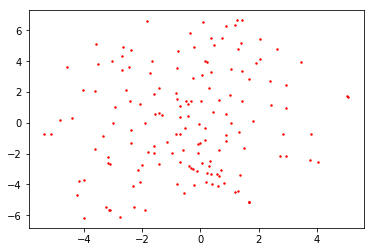

In [26]:
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c='r', s=2)
plt.show()

In [29]:
X_pos = model_300[custom_synsets_set_pos]

In [30]:
X_neg = model_300[custom_synsets_set_neg]

In [31]:
X_pos = X_pos[:10]
X_neg = X_neg[:10]

In [32]:
X_list = []
for xs in X_pos:
    X_list.append(xs)
for xs in X_neg:
    X_list.append(xs)

In [33]:
print(len(X_pos))

10


In [34]:
print(len(X_list))

20


In [35]:
X_tsne = tsne.fit_transform(X_list)

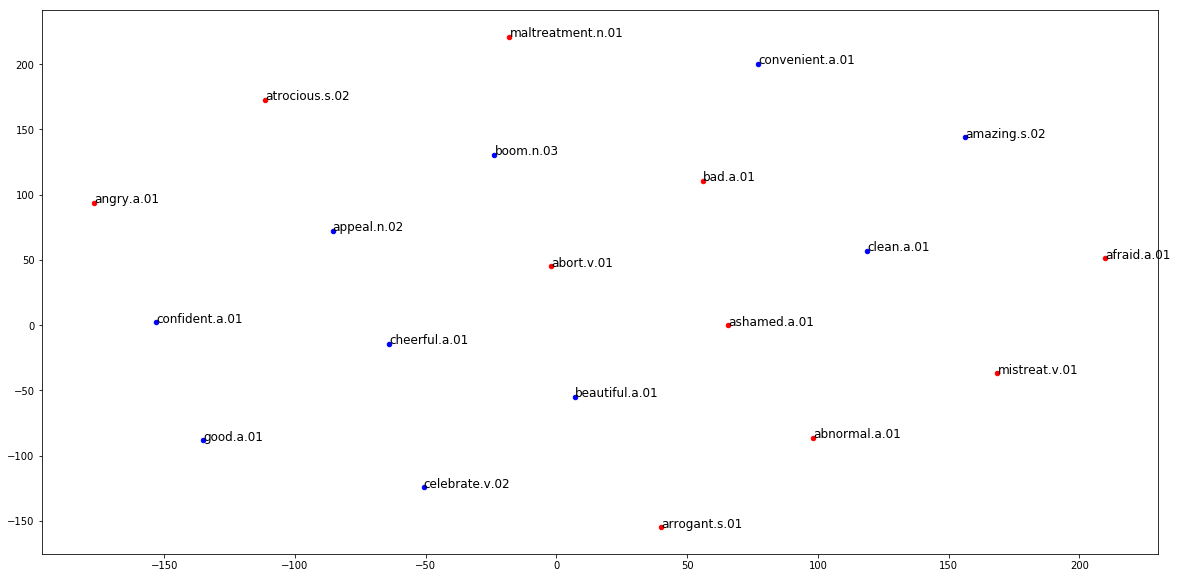

In [45]:
plt.close()
plt.figure(figsize=(20,10))

plt.scatter(X_tsne[:len(X_pos), 0], X_tsne[:len(X_pos), 1], c='b', s=20)
plt.scatter(X_tsne[len(X_pos):, 0], X_tsne[len(X_pos):, 1], c='r', s=20)

for i, word in enumerate(custom_synsets_set_pos[:10]):
    plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]), size = 12)

for i, word in enumerate(custom_synsets_set_neg[:10]):
    plt.annotate(word, xy=(X_tsne[i+10, 0], X_tsne[i+10, 1]), size = 12)
plt.show()

In [46]:
from sklearn.decomposition import PCA

In [47]:
pca = PCA(n_components=2)

In [48]:
X_pca = pca.fit_transform(X_list)

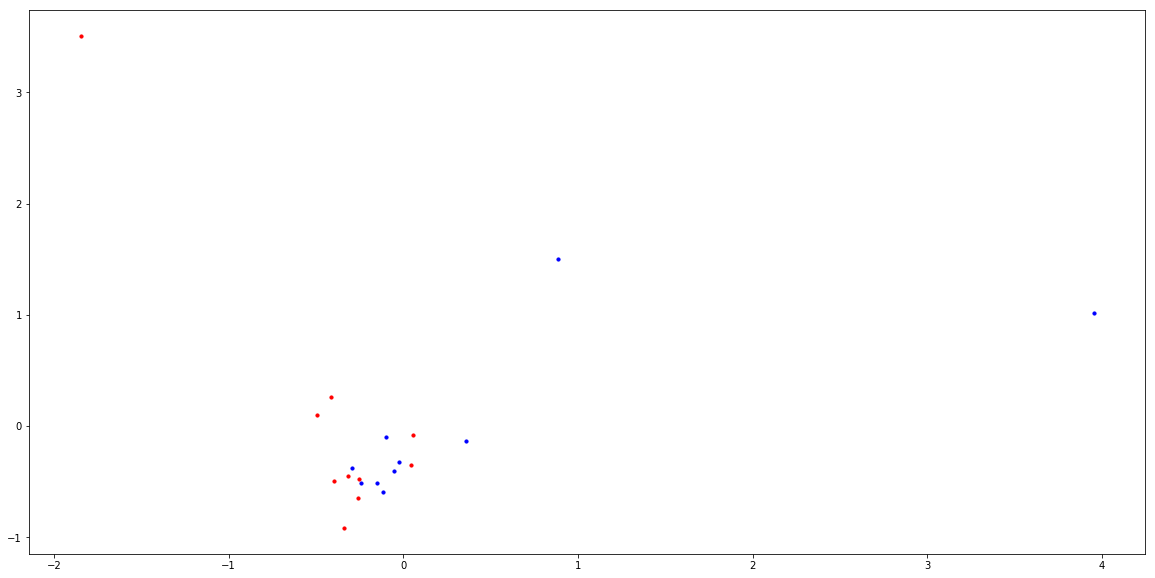

In [52]:
plt.figure(figsize=(20,10))

plt.scatter(X_pca[:len(X_pos), 0], X_pca[:len(X_pos), 1], c='b', s=10)
plt.scatter(X_pca[len(X_pos):, 0], X_pca[len(X_pos):, 1], c='r', s=10)

# for i, word in enumerate(custom_synsets_set_pos[:10]):
#     plt.annotate(word, xy=(X_pca[i, 0], X_pca[i, 1]), size=15)

# for i, word in enumerate(custom_synsets_set_neg[:10]):
#     plt.annotate(word, xy=(X_pca[i+10, 0], X_pca[i+10, 1]), size=15)
plt.show()

In [54]:
model_300.similarity('positive.a.01', 'good.a.01')

0.57180419809554062

In [164]:
fname = 'model_syn2vec_10000'
model.save(fname)

2017-12-05 03:30:04,169 : INFO : saving Word2Vec object under model_syn2vec_10000, separately None
2017-12-05 03:30:04,172 : INFO : storing np array 'syn0' to model_syn2vec_10000.wv.syn0.npy
2017-12-05 03:31:25,257 : INFO : not storing attribute syn0norm
2017-12-05 03:31:25,275 : INFO : storing np array 'syn1neg' to model_syn2vec_10000.syn1neg.npy
2017-12-05 03:46:59,900 : INFO : not storing attribute cum_table
2017-12-05 03:47:02,453 : INFO : saved model_syn2vec_10000


In [169]:
fname = 'model_syn2vec_1000'
model_1000.save(fname)

2017-12-05 03:52:06,819 : INFO : saving Word2Vec object under model_syn2vec_1000, separately None
2017-12-05 03:52:06,823 : INFO : storing np array 'syn0' to model_syn2vec_1000.wv.syn0.npy
2017-12-05 03:52:08,688 : INFO : not storing attribute syn0norm
2017-12-05 03:52:08,756 : INFO : storing np array 'syn1neg' to model_syn2vec_1000.syn1neg.npy
2017-12-05 03:52:10,609 : INFO : not storing attribute cum_table
2017-12-05 03:52:11,152 : INFO : saved model_syn2vec_1000


In [172]:
fname = 'model_syn2vec_500'
model_500.save(fname)

2017-12-05 03:53:56,822 : INFO : saving Word2Vec object under model_syn2vec_500, separately None
2017-12-05 03:53:56,823 : INFO : storing np array 'syn0' to model_syn2vec_500.wv.syn0.npy
2017-12-05 03:53:57,640 : INFO : not storing attribute syn0norm
2017-12-05 03:53:57,641 : INFO : storing np array 'syn1neg' to model_syn2vec_500.syn1neg.npy
2017-12-05 03:53:58,777 : INFO : not storing attribute cum_table
2017-12-05 03:53:59,199 : INFO : saved model_syn2vec_500


In [166]:
model_s2v = gensim.models.Word2Vec.load(fname)

2017-12-05 03:47:59,064 : INFO : loading Word2Vec object from model_syn2vec_10000
2017-12-05 03:47:59,784 : INFO : loading wv recursively from model_syn2vec_10000.wv.* with mmap=None
2017-12-05 03:47:59,788 : INFO : loading syn0 from model_syn2vec_10000.wv.syn0.npy with mmap=None
2017-12-05 03:48:13,760 : INFO : setting ignored attribute syn0norm to None
2017-12-05 03:48:13,769 : INFO : loading syn1neg from model_syn2vec_10000.syn1neg.npy with mmap=None
2017-12-05 03:48:57,129 : INFO : setting ignored attribute cum_table to None
2017-12-05 03:48:57,150 : INFO : loaded model_syn2vec_10000


### word2vec with plain words in WordNet

In [55]:
import re
import preprocessor as p

In [56]:
all_words  = set(i for i in wn.words())

In [57]:
len(all_words)

147306

In [58]:
'excellent' in all_words

True

In [59]:
## Negation
replace_dict = {
    "don't": "do not",
    "won't": "will not",
    "didn't": "did not",
    "doesn't": "does not",
    "can't": "can not",
    "couldn't": "could not",
    "isn't": "is not",
    "shouldn't": "should not",
    "wouldn't": "would not",
    "wasn't": "was not",
    "weren't": "were not",
    "haven't": "have not",
    "ain't": "is not",
    "aren't": "are not",
}

def replace_word(text):
    for word in replace_dict:
        if word in text:  # Small first letter
            text = text.replace(word, replace_dict[word])
        elif word[0].title() + word[1:] in text:  # Big first letter
            text = text.replace(word[0].title() + word[1:],
                                replace_dict[word][0].title() + replace_dict[word][1:])

    return text

def neg_tagging(word_list):
    string = ' '.join(word_list)
    transformed = re.sub(r'\b(?:not|never|no)\b[\w\s]+[^\w\s]', 
           lambda match: re.sub(r'(\s+)(\w+)', r'\1NEG_\2', match.group(0)), 
           string,
           flags=re.IGNORECASE)
    
    return transformed

def negate(word_list):
    negged_sentence = neg_tagging(word_list)
    negged_tokens = negged_sentence.split()

    token_pair_list = []
    
    for word in negged_tokens:
        negation = False
        if word.startswith('NEG_'):
            negation = True
            word = word[4:]
        token_pair_list.append((word, negation))
    
    return token_pair_list

In [60]:
def GetNegatedTokens(sentence):
    cleaned_sentence = p.clean(sentence)
    replaced_sentence = replace_word(cleaned_sentence)
    replaced_sentence_word_list = replaced_sentence.split(" ")

    token_negation_pair_list = negate(replaced_sentence_word_list)

    return token_negation_pair_list

In [61]:
all_synset_list = list(wn.all_synsets())
all_ss_df_token_list = []
for ss in all_synset_list:
    curr_def = GetNegatedTokens(ss.definition())
    for lemma in ss.lemmas():
        curr_def.append((lemma.name(), False))
    all_ss_df_token_list.append(curr_def)

In [62]:
len(all_ss_df_token_list)

117659

In [63]:
all_ss_df_token_list[0]

[('(usually', False),
 ('followed', False),
 ('by', False),
 ("`to')", False),
 ('having', False),
 ('the', False),
 ('necessary', False),
 ('means', False),
 ('or', False),
 ('skill', False),
 ('or', False),
 ('know-how', False),
 ('or', False),
 ('authority', False),
 ('to', False),
 ('do', False),
 ('something', False),
 ('able', False)]

In [64]:
word_df_word_pair_list = []

for df_token_pair_list in tqdm(all_ss_df_token_list):
    
    curr_ss_df_ss_list = []
    p_flag = False
    for df_token_pair in df_token_pair_list:
        if df_token_pair[0][0] == '(':
            p_flag = True
            continue
        if p_flag == True:
            if df_token_pair[0][-1] == ')':
                p_flag = False
                continue
        else:
            if df_token_pair[1] == False:
                curr_ss_df_ss_list.append(df_token_pair[0])
            else:
                if wn.synsets(df_token_pair[0]):
                    if wn.synsets(df_token_pair[0])[0].lemmas():
                        if wn.synsets(df_token_pair[0])[0].lemmas()[0].antonyms():
                            curr_ss_df_ss_list.append(wn.synsets(df_token_pair[0])[0].lemmas()[0].antonyms()[0].name())
#         else:
#             continue
            
    word_df_word_pair_list.append(curr_ss_df_ss_list)  


100%|██████████| 117659/117659 [00:01<00:00, 108801.29it/s]


In [65]:
len(word_df_word_pair_list)

117659

In [66]:
word_df_word_pair_list[:3]

[['having',
  'the',
  'necessary',
  'means',
  'or',
  'skill',
  'or',
  'know-how',
  'or',
  'authority',
  'to',
  'do',
  'something',
  'able'],
 ['not', 'unable'],
 ['facing',
  'away',
  'from',
  'the',
  'axis',
  'of',
  'an',
  'organ',
  'or',
  'organism',
  'abaxial',
  'dorsal']]

In [67]:
sentences[:3]

[['able.a.01', 'necessary.a.01', 'mean.n.01', 'authority.n.02'],
 ['unable.a.01', 'unnecessary'],
 ['abaxial.a.01',
  'front.v.01',
  'away.r.10',
  'bloc.n.01',
  'organ.n.02',
  'organism.n.02']]

In [68]:
w_model_300 = gensim.models.Word2Vec(iter=20) 

In [69]:
w_model_500 = gensim.models.Word2Vec(iter=20) 

In [70]:
word_df_word_pair_list[36]

['not', 'incapable']

In [71]:
w_model_300 = gensim.models.Word2Vec(word_df_word_pair_list, size=300, window=20, min_count=1, workers=8, sg=1, iter=20)

In [48]:
w_model_500 = gensim.models.Word2Vec(word_df_word_pair_list, size=500, window=20, min_count=1, workers=8, sg=1, iter=20)

In [72]:
w_model_300.wv.most_similar('good')

[('haleness', 0.5821603536605835),
 ('comeliness', 0.568153440952301),
 ('loveliness', 0.5583909749984741),
 ('beauteousness', 0.5581384301185608),
 ('successfulness', 0.5491814613342285),
 ('wellborn', 0.5484558939933777),
 ('luck', 0.5447827577590942),
 ('healthfulness', 0.5436230301856995),
 ('prospering;', 0.5435668230056763),
 ('fellow;', 0.5419723987579346)]

In [73]:
w_model_300.wv.most_similar('bad')

[('hard_cheese', 0.6364213228225708),
 ('cantankerously', 0.6340236067771912),
 ('tantrum', 0.6337926983833313),
 ('significantly;', 0.6304196715354919),
 ('disgruntle', 0.6257601976394653),
 ('conniption', 0.6252985000610352),
 ('unwholesomeness', 0.6226067543029785),
 ('weather-bound', 0.6206629872322083),
 ('morbidness', 0.6203004121780396),
 ('regrettably', 0.6188953518867493)]

In [74]:
## Custom positive word set
custom_words_set_pos = ['good', 'awesome', 'beautiful', 'boom', 'celebrate', 'charm', 'cheerful', 
                    'clean', 'confident', 'convenient', 'cozy', 'divine', 'easy', 'efficient',
                    'elegant', 'encourage', 'enjoy', 'entertain', 'excellent', 'exciting', 'fabulous',
                    'fresh', 'gentle', 'glad', 'generous', 'gorgeous', 'happy', 'joy', 'lovely', 
                    'lucky', 'outstanding', 'pleasing', 'pride', 'proper', 'sexy', 'smart',
                    'bright', 'comfortable', 'cool', 'faithful', 'famous', 'fine', 'handsome',
                    'healthy', 'honor', 'prefer', 'improve', 'inspire', 'intelligent', 'master',
                    'modest', 'nice', 'optimal', 'positive', 'peaceful', 'prosper', 'recommend',
                    'super', 'victory', 'wonderful', 'refresh', 'satisfy', 'sensational', 'smooth', 
                    'splendid', 'success', 'thoughtful', 'trust', 'win' ]

In [75]:
## Custom negative word set
custom_words_set_neg = ['abnormal', 'abort', 'abuse', 'afraid', 'angry', 'arrogant', 'ashamed', 
                    'awful', 'bad', 'bitch', 'blame', 'boring', 'brutal', 'bullshit',
                    'cancer', 'chaotic', 'cheat', 'cocky', 'conflict', 'confuse', 'controversial',
                    'corrupt', 'creepy', 'curse', 'dangerous', 'dead', 'defect', 'depression', 'destroy', 
                    'die', 'dick', 'disappoint', 'disbelief', 'discomfort', 'disgraceful', 'disobey',
                    'disturbing', 'dump', 'embarrass', 'error', 'exhaust', 'fail', 'fake', 
                    'false', 'fool', 'freak', 'fraud', 'grief', 'hard', 'harmed', 'idiot',
                    'ignorant', 'misfortune', 'mistake', 'murder', 'negative', 'painful', 'pervert', 
                    'poor', 'problem', 'racist', 'reject', 'sad', 'scold', 'screwed', 'selfish',
                    'silly', 'sloppy', 'stink', 'stupid', 'suck', 'terrible', 'trash', 'weak' ]


In [80]:
c_list = custom_words_set_pos + custom_words_set_neg

In [76]:
# tmp_all_list = []
# for pair in word_df_word_pair_list:
#     if len(pair) > 0:
#         tmp_all_list.append(pair[0])
    

In [81]:
X = w_model_300[c_list]
X_tsne = tsne.fit_transform(X)

In [82]:
len(X)

143

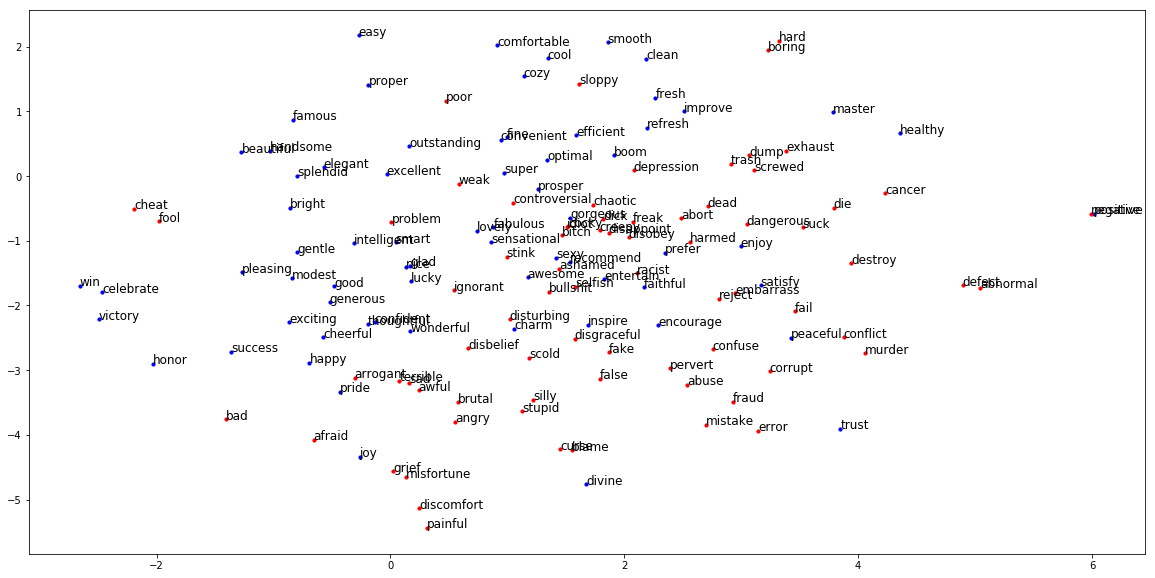

In [85]:
plt.figure(figsize=(20,10))

plt.scatter(X_tsne[:len(custom_words_set_pos), 0], X_tsne[:len(custom_words_set_pos), 1], c='b', s=10)
plt.scatter(X_tsne[len(custom_words_set_pos):, 0], X_tsne[len(custom_words_set_pos):, 1], c='r', s=10)

for i, word in enumerate(custom_words_set_pos[:]):
    plt.annotate(word, xy=(X_tsne[i, 0], X_tsne[i, 1]), size = 12)

for i, word in enumerate(custom_words_set_neg[:]):
    plt.annotate(word, xy=(X_tsne[i+len(custom_words_set_pos), 0], X_tsne[i+len(custom_words_set_pos), 1]), size = 12)
plt.show()